In [2]:
!pip3 install tensorflow
!pip3 install numpy
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install mlxtend--upgrade --no-deps
!pip3 install pandas

You should consider upgrading via the 'C:\Users\MLL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\MLL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\MLL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\MLL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement mlxtend--upgrade (from versions: none)
ERROR: No matching distribution found for mlxtend--upgrade
You should consider upgrading via the 'C:\Users\MLL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\MLL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


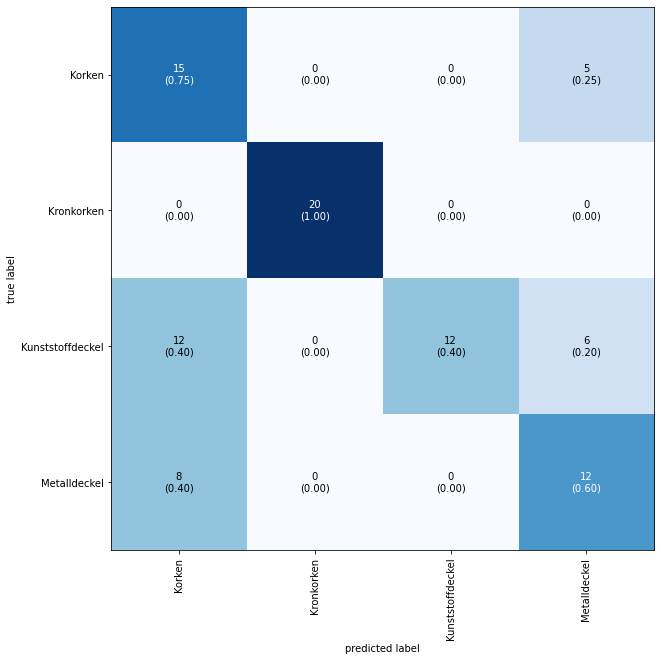

,Korken,Kronkorken,Kunststoffdeckel,Metalldeckel
max Abweichung True,0.25,0.0,0.4,0.4
max Abweichung Pred,0.4,0.0,0.0,0.25
Summe Abweichung True,0.25,0.0,0.6,0.4
Summe Abweichung Pred,0.8,0.0,0.0,0.45
Accuracy,0.655556,,,
Best Class,Kronkorken,,,


<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import io 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

Mat=[[15,0,0,5],
    [0,20,0,0],
    [12,0,12,6],
    [8,0,0,12]
    ]

labels=["Korken", "Kronkorken", "Kunststoffdeckel", "Metalldeckel"]

Mat=np.array(Mat)
def plot_to_image(figure):
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  #plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  image = tf.expand_dims(image, 0)
  return image


figure, ax = plot_confusion_matrix(conf_mat=Mat,figsize=(10,10),show_normed=True)
x = np.arange(0,4)
y = np.arange(0,4)
ax.set_xticks(x)
ax.set_yticks(y)


ax.set_xticklabels(labels, rotation='vertical')
ax.set_yticklabels(labels)

plt.show()

cm_image = plot_to_image(figure)


# ab hier werden noch Werte berechnet, die benutzt werden können um Netze zu vergleichen

# bestes Klasse

not_correct = 0
correct = 0
best = []
prob_mat = []
prob_mat_row =[]


for i in range(0,4):

    correct = Mat[i,i]+correct
    best = best + [Mat[i,i]]

    for j in range(0,4):

      prob_mat_row = prob_mat_row + [Mat[i,j]/sum(Mat[i,:])]
      if i != j:
        not_correct = not_correct + Mat[i,j]

    prob_mat = prob_mat + [prob_mat_row]
    prob_mat_row =[]



Accuracy = correct/(correct+not_correct)


best_value = max(best)
best = best.index(best_value)


prob_mat = np.array(prob_mat)

max_dev_true = []
max_dev_pred = []

# Hier werden noch die Maximale Abweichung und die Gesamte Abweichung berechnet. Die Ausgabe ist ein Array, der die Werte für jede Klasse angibt

# max_dev_true (maximale Abweichung bezüglich des True Labels)
#         Erklärung : Maximalwert wie oft diese Klasse falsch zugeordnet wurde. 
#                     Kleines Indiz für Streumaß. Maximalwert: Kronkorken ist in klasse X gelandet.

# max_dev_pred (maximale Abweichung bezüglich des predicteten Labels)
#         Erklärung : Maximalwert der Abweichungen vom predicteten label. 
#                     Kleines Indiz für Streumaß. Maximalwert: Prediction "Kronkorken" war falsch.


# dev_each_true (Gesamtabweichung vom true Label)
#         Erklärung : Gesamte Abweichung vom korrektem true label. 
#                     Also Wie viel Prozent der Deckel dieser Klasse wurden nicht dieser Klasse zugeordnet

# dev_each_true (Gesamtabweichung vom true Label)
#         Erklärung : Gesamte Abweichung vom korrektem predictetem label. 
#                      Also wie viel Prozent der Deckel  hätten dieses Label nicht bekommen sollen.


for i in range(0,4):
  prob_mat[i,i]= 0
  max_dev_true = max_dev_true + [np.amax(prob_mat[i,:])]     #berechnet maximalabweichung
  max_dev_pred= max_dev_pred + [np.amax(prob_mat[:,i])]    #berechnet maximalabweichung
  
dev_each_true = np.sum(prob_mat,axis=1).tolist()    #berechnet gesamtabweichung
dev_each_pred = np.sum(prob_mat,axis=0).tolist()   

classes = ['max Abweichung True', 'max Abweichung Pred', 'Summe Abweichung True', 'Summe Abweichung Pred']
df = pd.DataFrame([max_dev_true,max_dev_pred,dev_each_true,dev_each_pred],index=classes, columns=labels)
df.loc['Accuracy'] = [Accuracy] + [""] * (len(labels) - 1)
df.loc['Best Class'] = [labels[best]] + [""] * (len(labels) - 1)


df